# Exploratory Analysis of Eviction data

Because I can't make the meeting tonight, I wanted to do a little implementation of Chris' feedback using data to have a baseline with which to refine our research question and focus on specific variables

I found out that the 'clip' function in geopandas will be helpful if/once we decide to focus on certain neighborhoods so we can limit the 'points' of eviction notices to the areas we want to look at. I'll try to do an example here.

In [1]:
# Import required packages
import geopandas as gpd
import pandas as pd
import folium as fm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [4]:
neighborhoods = gpd.read_file('data/LA_Times_Neighborhood_Boundaries.geojson')


In [7]:
ct_la = gpd.read_file('data/Census_Tracts_2020.geojson')

In [27]:
evictions = pd.read_csv('data/2023_Eviction_Notices.csv')

In [29]:
evictions['Address'].sample(20)

67791            6701 N ETON AVE
13534        7367 Hollywood Blvd
36777         8635 N SNOWDEN AVE
13102        325 West Adams Blvd
41253       20600 W VENTURA BLVD
41544            553 S CERES AVE
76123           1522 N GORDON ST
2559           6069 Fragrans Way
16396           10026 Palms Blvd
50912    864 S NEW HAMPSHIRE AVE
24372            9041 Cedros Ave
20316     3333 S La Cienega Blvd
14794           8155 Langdon Ave
32158           636 W 5th Street
6708         1672 S Harvard Blvd
32914         5020 N TUJUNGA AVE
56338             900 S IROLO ST
23726            14309 Sylvan St
21133     938 S Orange Grove Ave
9982          2737 San Marino St
Name: Address, dtype: object

In [5]:
neighborhoods.columns

Index(['OBJECTID', 'name', 'geometry'], dtype='object')

In [6]:
neighborhoods.head()

,OBJECTID,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."


In [8]:
ct_la.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<Axes: >

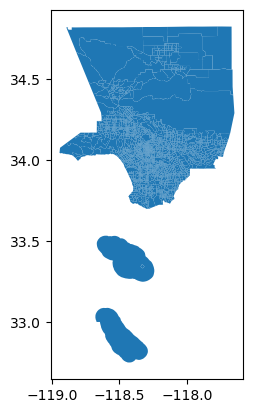

In [9]:
ct_la.plot()

In [10]:
ct_la = ct_la.to_crs(4326)

In [19]:
ct_la['FIPS'] = ct_la['CT20'].astype(str)

In [20]:
ct_la['FIPS'] = '06037' + ct_la['FIPS']

In [21]:
ct_la['FIPS'].head()

0    06037101110
1    06037101122
2    06037101220
3    06037101221
4    06037101222
Name: FIPS, dtype: object

In [24]:
neigh_tract = gpd.sjoin(ct_la, neighborhoods, how='inner')


In [25]:
neigh_tract.head()

,OBJECTID_left,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,index_right,OBJECTID_right,name
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,92,93,Tujunga
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,92,93,Tujunga
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,92,93,Tujunga
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,92,93,Tujunga
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,92,93,Tujunga


<Axes: >

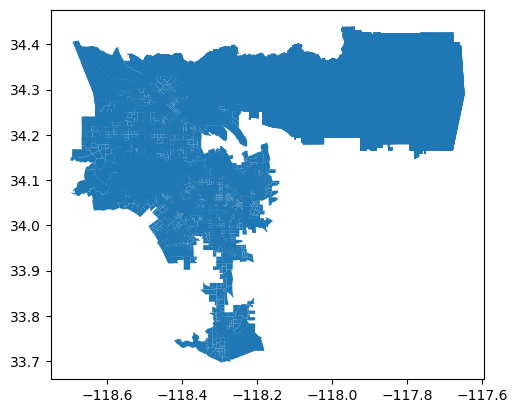

In [26]:
neigh_tract.plot()